# HW1-EREN TUMKAYA-090190328

## Q1

 First thing I did, after reading the bullets carefully, was to start searching the [site](https://climateknowledgeportal.worldbank.org/) which was given to us in the instructions.    
 
 While doing that, I also checked whether those countries really have a border with mediterranian sea.

![Image of Mediterranian Map](https://cdn.britannica.com/10/6010-050-56184E94/Mediterranean-Sea.jpg)

Altough I had doubts about some, namely Bosnia and Herzegovina and Slovenia, I was able to find my answers with the following links, respectively: [Bosnia and Herzegovina border](https://www.britannica.com/place/Bosnia-and-Herzegovina) ,[Slovenia border](https://www.britannica.com/place/Slovenia).  


Finally I was confident that the statement "The Mediterranean Sea is bordered by following 22 countries" was reliable.

### Obtaining the Data 

 It took me quite some time to find out how to obtain the data, from the [dataportal](https://climateknowledgeportal.worldbank.org/download-data#htab-1500), required for this task. 
 
 Thanks to the Data Dictionary, I found Precipitation data with the code "pr" and surface temperature with "tas". In Data Acces Tool page I intended to create my API.
 
 Then I realised that I could only get an api link which included maximum of 3 countries as a condition. 
I tried to overcome this by selecting 3 countries, creating my api link and then adding the countries I required to the API link by hand. Main reason I did this was the instruction we were given on obtaining the data as one piece.  

 While I was adding "Palestine" I noticed that it wasn't on the list. I went back and looked at the map on the site. I managed to find out that it was called "[West Bank and Gaza](https://climateknowledgeportal.worldbank.org/country/west-bank-and-gaza)". Added it to the list as well.  
 
 Now I had an API link(which stated that it was a json file at the end of the link) but tbh I didn't remember the code to ingest it to my notebook. For this matter I checked our [Lecture 3](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-03.ipynb).Found out that I needed to import the library first and did it along with our famous pandas library.
 
 
 
 
 
 
 
 

In [233]:
import pandas as pd
from urllib.request import urlopen
import json

In [235]:
with urlopen("https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/REU,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,MLT,CYP,MCO,ESP?_format=json") as url:
    DataFrame = json.load(url)
DataFrame.keys()


dict_keys(['metadata', 'data'])

I tried to understand the json file by opening the file myseld on the browser. Also found a [site](https://realpython.com/python-json/) to find out how I can deal with json files .   
Then I realised that I could just change the "format=json" extension to "format=xlsx" and opened it on the browser. For me, who didn't have prior experience with API links, it was a magnificient discovery to see that it opened up as a two worksheet excel.

In [236]:
Pr_Tas_DataFrame=pd.read_excel("https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/REU,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,MLT,CYP,MCO,ESP?_format=xlsx")

I needed to seperate these worksheets in order to work with "precipitation" and "average mean surface", as expected from me. Here I used the help of Chat GPT. My question and answer can be seen [here](https://chat.openai.com/share/1050c43f-a44a-4d8b-b63d-4106582585c6)  

At this very moment, I realised that I made a mistake, I was supposed to obtain the data and before using "read_excel" , had to indicate two worksheets. I don't delete my mistaken previous row in order for it to be informative of my work but I followed another path from now on.

In [4]:
API_EXCEL="https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/REU,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,MLT,CYP,MCO,ESP?_format=xlsx"

For this part I needed to know the names of the worksheets and what my excel looked like. Well, since it popped up on my browser when I opened the link, I knew it already. I had two worksheets named "pr" and "tas", respectively.

In [237]:
surface_temp=pd.read_excel(API_EXCEL,sheet_name="tas" )
precipitation=pd.read_excel(API_EXCEL,sheet_name="pr" )

surface_temp.info()
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 854 entries, code to 2020-12
dtypes: float64(852), object(2)
memory usage: 146.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 854 entries, code to 2020-12
dtypes: float64(852), object(2)
memory usage: 146.9+ KB


Since I wanted to check if I obtained both of the seperate files, I wanted to see some rows and columns.

In [238]:
surface_temp.head(22)

,code,name,1950-01,1950-02,1950-03,1950-04,1950-05,1950-06,1950-07,1950-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ALB,Albania,0.39,4.68,7.35,11.63,16.16,20.35,25.01,23.62,...,8.37,11.20,16.04,18.50,22.68,23.05,20.25,13.81,8.99,7.46
1,BIH,Bosnia and Herzegovina,-3.92,1.36,4.82,9.19,14.71,19.53,23.06,22.04,...,6.07,10.45,13.59,17.42,19.81,20.98,17.06,11.35,6.08,4.27
2,CYP,Cyprus,9.83,10.75,13.85,18.01,19.95,24.39,26.68,26.38,...,14.99,17.37,21.99,23.84,28.02,28.54,28.07,24.68,19.03,15.94
3,DZA,Algeria,10.01,12.80,16.29,21.04,26.50,32.33,32.86,32.04,...,19.92,25.13,29.62,33.40,34.90,34.73,31.43,25.51,18.39,14.55
4,EGY,Arab Republic of Egypt,11.83,12.59,16.98,23.50,25.64,28.23,29.88,29.32,...,18.82,22.42,27.21,29.81,30.61,31.00,30.18,26.33,18.37,16.35
5,ESP,Spain,4.97,7.33,9.37,11.02,14.46,20.31,24.11,22.07,...,10.20,12.71,17.77,19.61,24.58,23.34,19.55,13.58,11.24,7.17
6,GRC,Greece,2.60,6.77,8.60,13.98,17.61,22.01,25.79,24.78,...,10.44,12.36,17.90,21.15,24.73,24.76,22.40,17.33,11.36,10.12
7,HRV,Croatia,-1.35,3.51,7.25,10.85,16.95,21.85,24.88,23.76,...,7.99,12.42,15.52,19.68,22.04,23.09,18.57,13.00,7.41,5.42
8,ISR,Israel,9.35,9.79,14.36,20.61,21.74,24.31,26.40,25.90,...,15.85,18.60,23.59,25.15,27.74,27.92,28.64,25.07,18.39,15.21
9,ITA,Italy,2.59,5.40,7.71,9.89,15.65,20.72,24.35,22.52,...,8.24,12.07,16.57,19.15,22.68,23.38,19.49,13.26,10.29,6.34


In [239]:
precipitation.head(22)

,code,name,1950-01,1950-02,1950-03,1950-04,1950-05,1950-06,1950-07,1950-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ALB,Albania,97.35,87.45,57.06,108.63,39.78,23.41,3.25,15.54,...,157.89,92.07,62.65,78.24,23.64,57.18,113.53,185.30,12.27,201.66
1,BIH,Bosnia and Herzegovina,78.33,87.53,81.82,85.88,33.80,20.94,23.37,13.63,...,80.71,39.42,113.40,131.63,65.13,119.86,85.74,147.62,34.98,177.84
2,CYP,Cyprus,68.26,30.95,54.18,32.61,34.12,2.59,0.57,0.44,...,59.12,30.97,11.22,0.97,0.20,0.70,1.62,2.31,97.35,74.32
3,DZA,Algeria,9.54,3.24,5.26,5.48,4.34,0.79,0.25,3.21,...,8.38,14.20,3.07,1.45,1.34,1.41,4.49,1.36,4.55,6.36
4,EGY,Arab Republic of Egypt,2.65,1.60,0.90,0.94,1.22,0.62,2.60,1.16,...,16.34,0.29,0.70,0.04,0.18,0.13,0.22,0.50,2.76,1.01
5,ESP,Spain,29.45,57.43,37.33,33.08,71.20,26.27,8.92,17.71,...,93.33,103.34,60.34,43.81,14.45,28.52,41.17,70.78,71.89,74.47
6,GRC,Greece,86.34,59.23,90.62,67.39,42.14,18.37,1.95,2.74,...,108.99,100.38,48.77,41.73,21.89,34.55,52.62,47.51,35.34,154.60
7,HRV,Croatia,87.53,78.08,48.30,98.04,19.68,18.86,22.34,14.64,...,61.25,26.84,81.34,101.21,62.88,125.63,94.17,171.13,42.62,166.63
8,ISR,Israel,58.02,37.63,30.46,5.36,6.65,0.44,0.99,0.54,...,68.79,18.80,8.63,1.41,0.59,1.72,1.32,1.06,43.54,27.34
9,ITA,Italy,72.88,82.85,42.86,115.70,44.61,34.81,19.90,44.03,...,101.03,58.99,77.56,105.68,49.01,90.75,86.94,129.30,52.25,177.42


## Operations on the Data

Both seems fine, I want to transpose them though. It will convert them into a form which I am more used to seeing. Also I don't see a point of keeping the code column (row when transposed). I wanted to write a function since I will be using these operations on both sheets.

In [240]:
def operations(df):
    df1=df.copy()
    df1=df1.drop("code",axis="columns")
    df1=df1.transpose()
    df1.reset_index(inplace=True)
    headers=df1.iloc[0]
    df1=pd.DataFrame(df1.values[1:],columns=headers)
    df1 = df1.rename(columns={'name': "Dates"})
    return df1


Writing this code took so much time of mine, I thought transposing would be an easy task. Well, I had so many problems with indexes.First problem I had was the fact that my indexes went to be column indexes. I tried to solve this issue by checking many sources. One youtube [video](https://www.youtube.com/watch?v=6AjYmHLHlpY) gave me some sort of solution.    

I was able to set my headers to countries as I wanted. However, solution came with another problem; My date rows were gone and replaced by indexes. Since I didnt have indexes in the rows (when I transposed), I thought of the idea of adding row indexes and doing the operation in the video. Well, it worked. I should give some credit to [page](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html), I visited this page quite a few times.
Now the only problem seemed like "name"  column which was supposed to be the "date" column. I added that function as well. We used this function(df.rename) in our class "Computational Data Science"(which I am taking this semester) that is how I was aware of its name and usage.  

One thing to note here, I was running all the codes in this function one by one to find out problems, I am adding it as a function because I have two sheets in the same format and was tasked to not use same operations again. 

Another thing to note here, I changed all my files and added the dataframe.copy() functions. I didn't want to change the actual dataframes with my functions because I faced many errors near the end of this task. I wanted to create new dataframe names after each function although it seemed hard at first, it was easier to follow.Here is the [log](https://chat.openai.com/share/acd534e2-7dd7-4530-b472-219e20b80e20) where I had my tip to do that.





In [241]:
new_surface=operations(surface_temp)
new_precipitation=operations(precipitation)
new_surface.head()

,Dates,Albania,Bosnia and Herzegovina,Cyprus,Algeria,Arab Republic of Egypt,Spain,Greece,Croatia,Israel,...,Morocco,Monaco,Malta,Montenegro,West Bank and Gaza,France,Slovenia,Syrian Arab Republic,Tunisia,Türkiye
0,1950-01,0.39,-3.92,9.83,10.01,11.83,4.97,2.6,-1.35,9.35,...,8.05,4.7,13.78,-3.41,8.65,23.49,-3.14,2.59,8.11,-5.39
1,1950-02,4.68,1.36,10.75,12.8,12.59,7.33,6.77,3.51,9.79,...,11.16,7.06,14.09,1.11,8.77,23.25,1.67,4.58,10.42,-2.45
2,1950-03,7.35,4.82,13.85,16.29,16.98,9.37,8.6,7.25,14.36,...,13.75,8.8,14.23,4.02,13.26,22.47,5.8,11.83,12.71,3.96
3,1950-04,11.63,9.19,18.01,21.04,23.5,11.02,13.98,10.85,20.61,...,15.34,9.91,16.27,8.53,19.71,21.97,8.33,20.23,16.41,12.38
4,1950-05,16.16,14.71,19.95,26.5,25.64,14.46,17.61,16.95,21.74,...,18.47,15.33,18.84,13.48,21.09,19.58,14.92,21.82,22.01,14.5


In [242]:
surface_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 854 entries, code to 2020-12
dtypes: float64(852), object(2)
memory usage: 146.9+ KB


In [243]:
new_precipitation.head()

,Dates,Albania,Bosnia and Herzegovina,Cyprus,Algeria,Arab Republic of Egypt,Spain,Greece,Croatia,Israel,...,Morocco,Monaco,Malta,Montenegro,West Bank and Gaza,France,Slovenia,Syrian Arab Republic,Tunisia,Türkiye
0,1950-01,97.35,78.33,68.26,9.54,2.65,29.45,86.34,87.53,58.02,...,32.07,28.89,103.62,107.09,88.79,249.4,85.96,55.2,34.08,103.27
1,1950-02,87.45,87.53,30.95,3.24,1.6,57.43,59.23,78.08,37.63,...,6.46,103.63,84.78,135.64,55.55,115.32,85.2,22.35,27.17,44.62
2,1950-03,57.06,81.82,54.18,5.26,0.9,37.33,90.62,48.3,30.46,...,10.2,48.47,55.22,73.45,41.02,177.42,35.55,33.56,36.09,68.85
3,1950-04,108.63,85.88,32.61,5.48,0.94,33.08,67.39,98.04,5.36,...,15.54,88.26,26.42,133.9,9.01,214.87,152.15,11.86,29.81,46.07
4,1950-05,39.78,33.8,34.12,4.34,1.22,71.2,42.14,19.68,6.65,...,17.88,46.76,3.61,52.71,12.4,59.87,37.82,23.34,10.05,101.8


Now it looks like it is in a really good shape to do my analysis. There are two important things that I need to do after having this table.   

Firstly, I need to check whether my datas have duplicates. This could have occured if same dates are written twice. If that is the case I need to delete them.

In [244]:
new_surface[new_surface["Dates"].duplicated()].shape

(0, 23)

In [245]:
new_precipitation[new_precipitation["Dates"].duplicated()].shape

(0, 23)

Both seem fine. Now I will check whether I have any null values in my sheets.

In [246]:
new_surface.isnull().sum()

0
Dates                     0
Albania                   0
Bosnia and Herzegovina    0
Cyprus                    0
Algeria                   0
Arab Republic of Egypt    0
Spain                     0
Greece                    0
Croatia                   0
Israel                    0
Italy                     0
Lebanon                   0
Libya                     0
Morocco                   0
Monaco                    0
Malta                     0
Montenegro                0
West Bank and Gaza        0
France                    0
Slovenia                  0
Syrian Arab Republic      0
Tunisia                   0
Türkiye                   0
dtype: int64

In [247]:
new_precipitation.isnull().sum()

0
Dates                     0
Albania                   0
Bosnia and Herzegovina    0
Cyprus                    0
Algeria                   0
Arab Republic of Egypt    0
Spain                     0
Greece                    0
Croatia                   0
Israel                    0
Italy                     0
Lebanon                   0
Libya                     0
Morocco                   0
Monaco                    0
Malta                     0
Montenegro                0
West Bank and Gaza        0
France                    0
Slovenia                  0
Syrian Arab Republic      0
Tunisia                   0
Türkiye                   0
dtype: int64

Again, both seem fine and now I move on to check datatypes of my table, I will correct them if anything is wrong. Apart from that, I need to change the data column and seperate it into two columns as "year" and "month" .This will help me group them by both seperately and fulfill the tasks.

In [248]:
new_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Dates                   852 non-null    object
 1   Albania                 852 non-null    object
 2   Bosnia and Herzegovina  852 non-null    object
 3   Cyprus                  852 non-null    object
 4   Algeria                 852 non-null    object
 5   Arab Republic of Egypt  852 non-null    object
 6   Spain                   852 non-null    object
 7   Greece                  852 non-null    object
 8   Croatia                 852 non-null    object
 9   Israel                  852 non-null    object
 10  Italy                   852 non-null    object
 11  Lebanon                 852 non-null    object
 12  Libya                   852 non-null    object
 13  Morocco                 852 non-null    object
 14  Monaco                  852 non-null    object
 15  Malta 

It seems like all my values are objects. I need to change the first one to "date" and the others to "float" format.I knew how to do it one by one with "astype" but thanks to [chat_gpt](https://chat.openai.com/share/5648bf34-7e9e-4c43-9313-bdc9835a0a52) I also learned how to change all. I wil define a function to do that because I need to perform this on both sheets.

In [249]:
def typecorrect(df):
     df1=df.copy()
     df1['Dates'] = pd.to_datetime(df1['Dates'])
     for col in df1.columns[1:]:
        df1[col]=df1[col].astype(float)
     return df1


In [252]:
corrected_surface=typecorrect(new_surface)
corrected_precipitation=typecorrect(new_precipitation)

In [253]:
corrected_surface.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Dates                   852 non-null    datetime64[ns]
 1   Albania                 852 non-null    float64       
 2   Bosnia and Herzegovina  852 non-null    float64       
 3   Cyprus                  852 non-null    float64       
 4   Algeria                 852 non-null    float64       
 5   Arab Republic of Egypt  852 non-null    float64       
 6   Spain                   852 non-null    float64       
 7   Greece                  852 non-null    float64       
 8   Croatia                 852 non-null    float64       
 9   Israel                  852 non-null    float64       
 10  Italy                   852 non-null    float64       
 11  Lebanon                 852 non-null    float64       
 12  Libya                   852 non-null    float64   

Now, in order to be able to group my data by months and years, I will seperate the date column. I will use a method which was shown to us in "Comptutational Data Science " class exercises.  
Again , I am defining a function so that I can use it in both sheets.

In [264]:
import calendar
def seperate_date(df):
    df1=df.copy()
    year = df1['Dates'].dt.year
    month = df1['Dates'].dt.month
    df1.insert(1,"Years",year)
    df1.insert(1,"Months",month)
    return df1


I got so many errors and checked our exercises again, I needed to import calender.It worked that way.

In [270]:
Seperated_Surface=seperate_date(corrected_surface)
Seperated_Precipitation=seperate_date(corrected_precipitation)

Seperated_Surface.head(13)

,Dates,Months,Years,Albania,Bosnia and Herzegovina,Cyprus,Algeria,Arab Republic of Egypt,Spain,Greece,...,Morocco,Monaco,Malta,Montenegro,West Bank and Gaza,France,Slovenia,Syrian Arab Republic,Tunisia,Türkiye
0,1950-01-01,1,1950,0.39,-3.92,9.83,10.01,11.83,4.97,2.60,...,8.05,4.70,13.78,-3.41,8.65,23.49,-3.14,2.59,8.11,-5.39
1,1950-02-01,2,1950,4.68,1.36,10.75,12.80,12.59,7.33,6.77,...,11.16,7.06,14.09,1.11,8.77,23.25,1.67,4.58,10.42,-2.45
2,1950-03-01,3,1950,7.35,4.82,13.85,16.29,16.98,9.37,8.60,...,13.75,8.80,14.23,4.02,13.26,22.47,5.80,11.83,12.71,3.96
3,1950-04-01,4,1950,11.63,9.19,18.01,21.04,23.50,11.02,13.98,...,15.34,9.91,16.27,8.53,19.71,21.97,8.33,20.23,16.41,12.38
4,1950-05-01,5,1950,16.16,14.71,19.95,26.50,25.64,14.46,17.61,...,18.47,15.33,18.84,13.48,21.09,19.58,14.92,21.82,22.01,14.50
5,1950-06-01,6,1950,20.35,19.53,24.39,32.33,28.23,20.31,22.01,...,23.80,20.11,23.51,17.70,24.06,18.43,19.33,26.05,26.91,18.08
6,1950-07-01,7,1950,25.01,23.06,26.68,32.86,29.88,24.11,25.79,...,27.93,23.73,26.13,21.98,26.23,17.26,21.87,28.52,28.76,21.77
7,1950-08-01,8,1950,23.62,22.04,26.38,32.04,29.32,22.07,24.78,...,25.90,21.78,26.61,20.62,25.80,17.04,20.39,27.30,28.35,21.51
8,1950-09-01,9,1950,20.08,17.23,25.08,29.39,27.17,19.22,22.46,...,22.21,17.94,25.10,16.67,24.89,17.24,15.34,25.46,25.95,20.09
9,1950-10-01,10,1950,13.63,9.78,21.29,22.92,23.28,14.81,15.96,...,16.57,14.48,22.00,10.21,21.49,19.21,8.25,19.14,19.96,11.29


## Grouping and Visualizing Data

Now I will group my data by months and find the averages of each month for each country. Again I will be doing that with a function.

In [292]:
def group_by_month(df):
    df1=df.copy()
    df1=df1.iloc[:,3:25].groupby(df1["Months"]).mean()
    return df1
    
    
 

Here, I went back to our second [class notes](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-02.ipynb) to remember group by once again.I believe I wont need to do that anymore. Also I used the iloc which I learned earlier.

<Axes: xlabel='Months'>

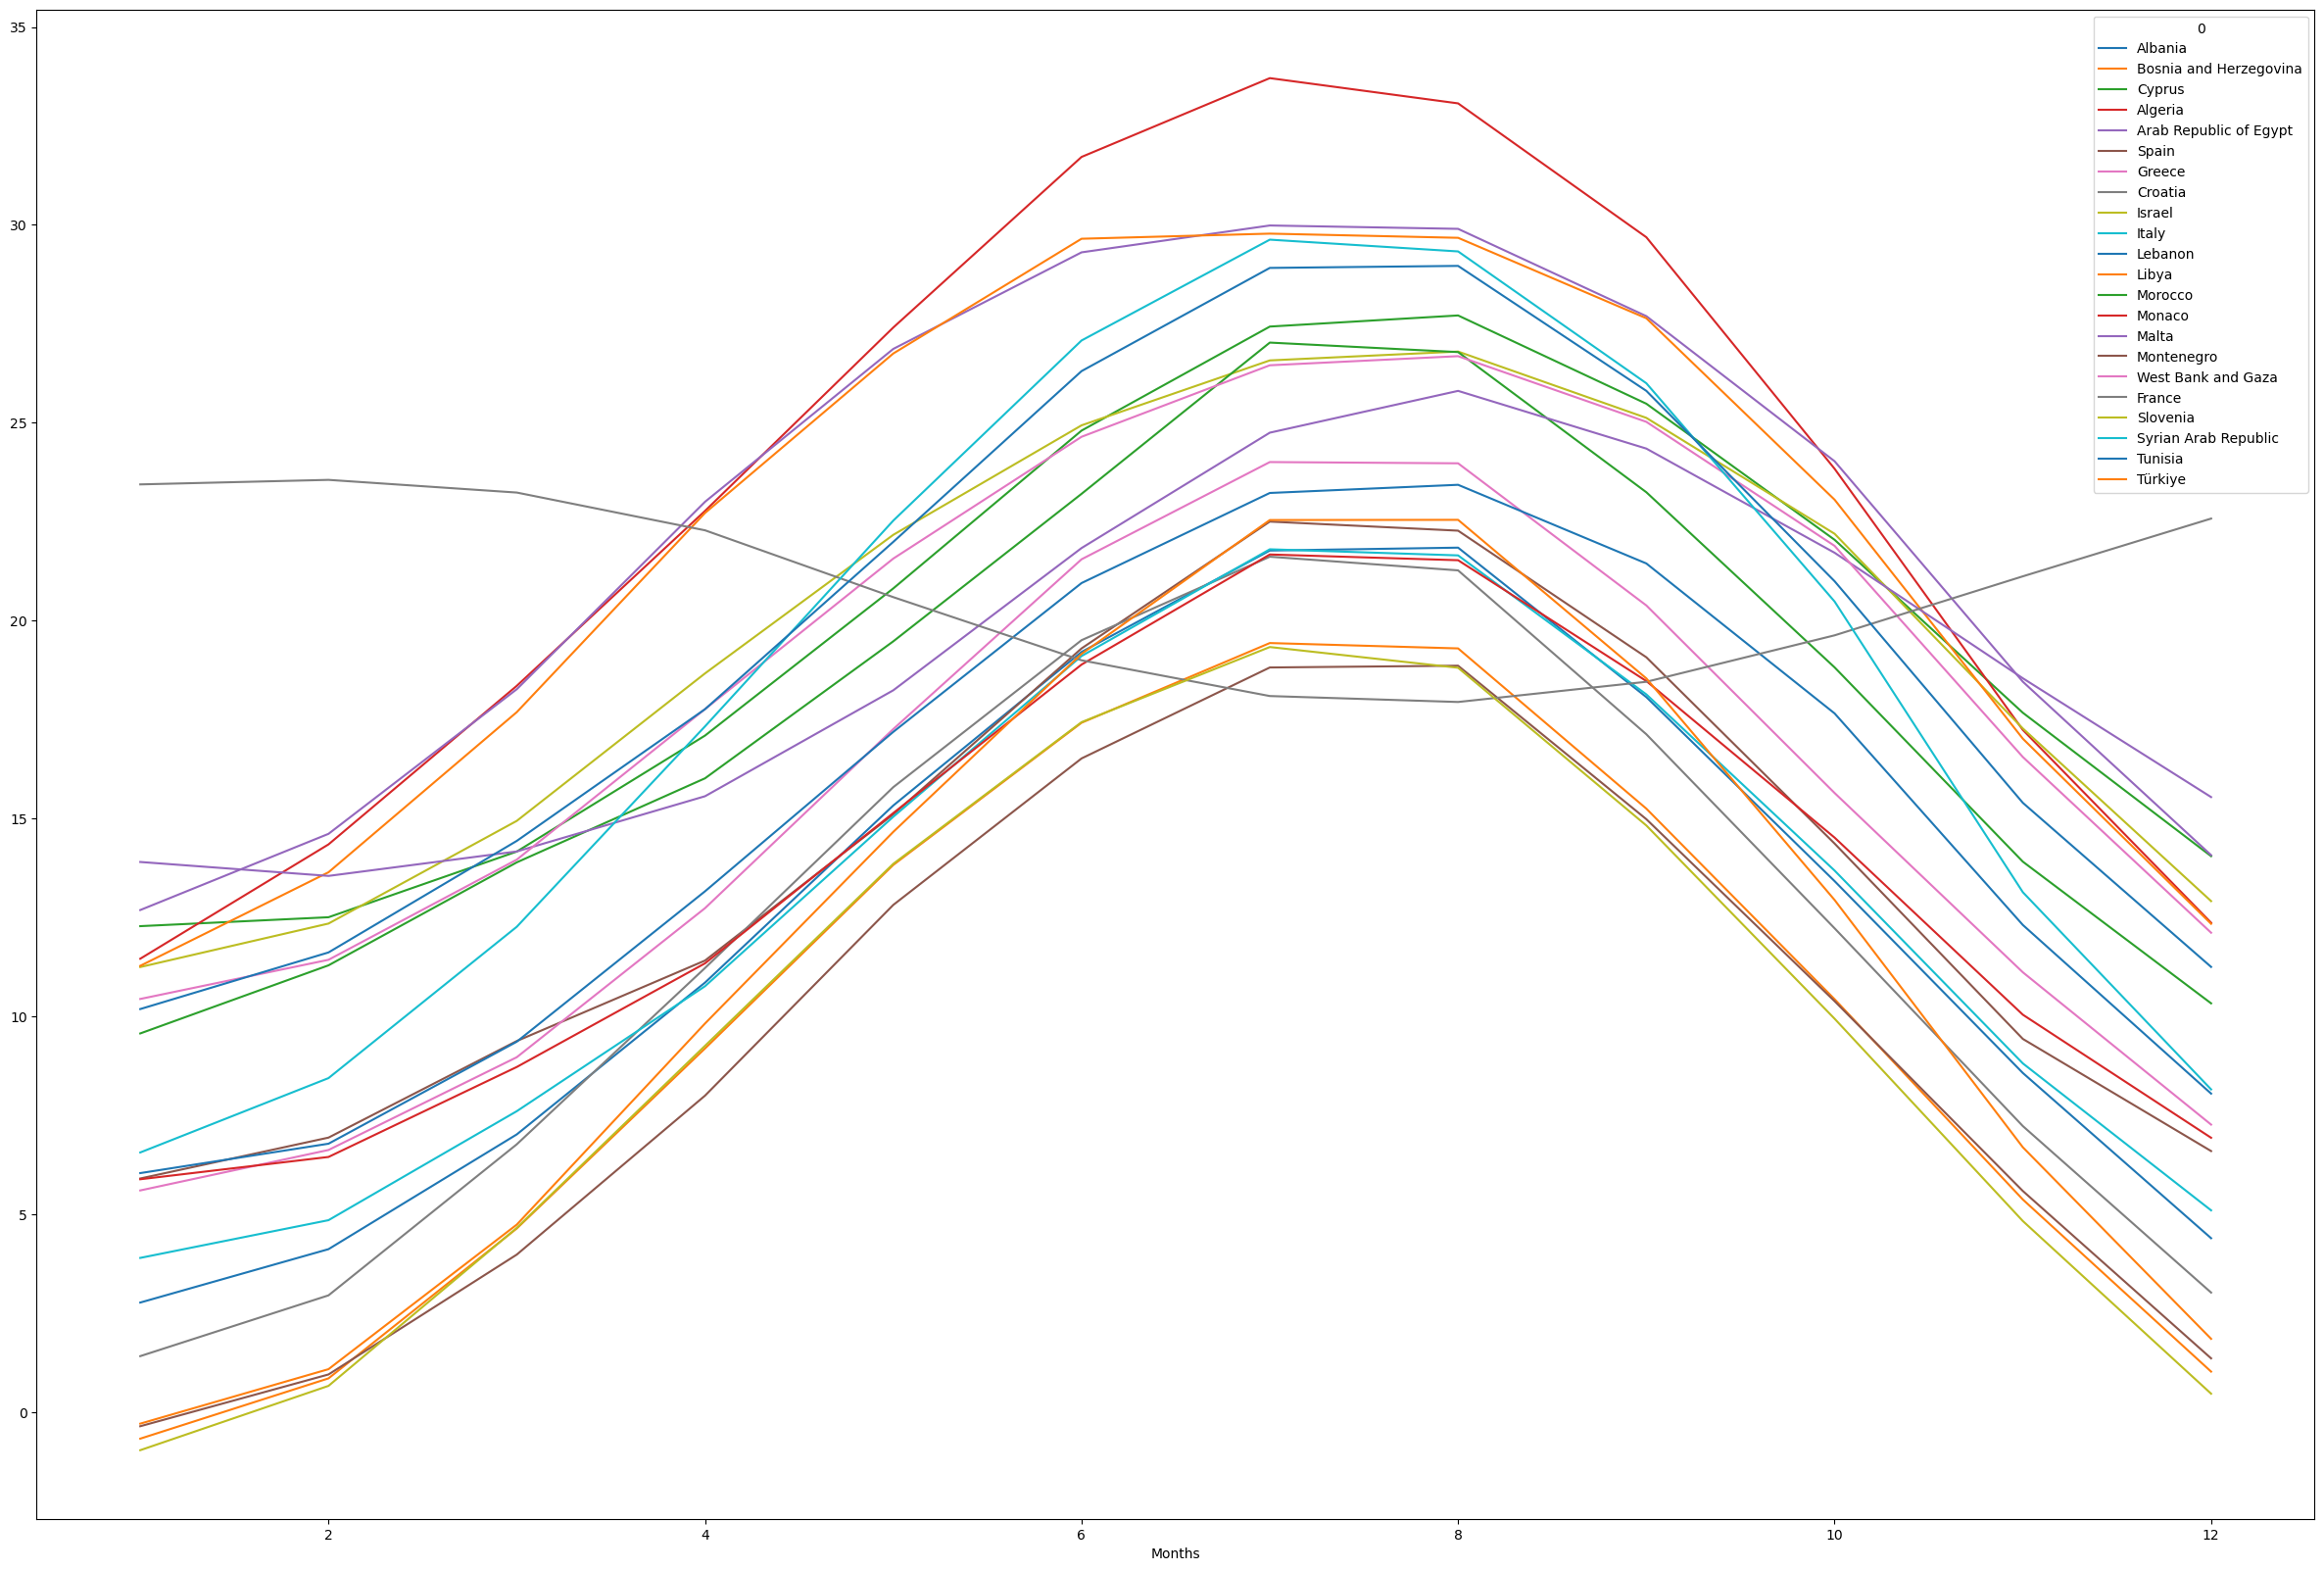

In [299]:
MAST=group_by_month(Seperated_Surface)
MAPR=group_by_month(Seperated_Precipitation)


MAST.plot(figsize=(30,20))

<Axes: xlabel='Months'>

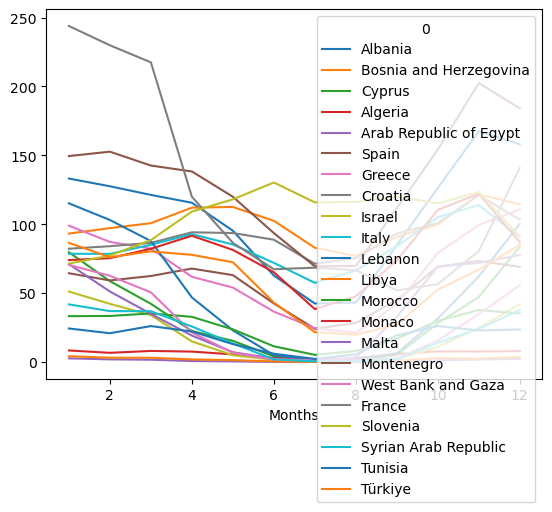

In [300]:
MAPR.plot()